## Idea :Old people tend to use bikes shorter distance than younger people do

## The mean bike trip duration by older people (Age>50) is equal ot longer than the mean bike trip duration by yonger people(Age<50)

###### H0:trip_duration(older)>=trip_duration(younger)

###### Ha:trip_duration(older)<trip_duration(younger)

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
#s = json.load( open(os.getenv('PUIDATA') + "/fb55_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/cc5219/PUIdata'

In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "/ -/ Citi/ Bike/ trip/ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
    os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [4]:
datestring = '201510'
getCitiBikeCSV(datestring)

file in place, you can continue


In [5]:
ls

CitibikeReview_as10790.md  HW3_2_cc5219.ipynb  #README.md#
HW3_1_cc5219.ipynb         HW3_2.ipynb         README.md
HW3_2_cc5219-Copy1.ipynb   HW3_3_cc5219.ipynb  times.txt


In [31]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973.0,1
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990.0,1
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984.0,1
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984.0,1
4,528,10/1/2015 00:00:17,10/1/2015 00:09:05,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,16246,Customer,NaN,0


In [32]:
df=df.dropna()
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973.0,1
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990.0,1
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984.0,1
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984.0,1
6,1185,10/1/2015 00:00:22,10/1/2015 00:20:07,531,Forsyth St & Broome St,40.718939,-73.992663,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,17110,Subscriber,1987.0,1
7,618,10/1/2015 00:00:25,10/1/2015 00:10:44,3002,South End Ave & Liberty St,40.711512,-74.015756,2004,6 Ave & Broome St,40.724399,-74.004704,16344,Subscriber,1989.0,1
8,865,10/1/2015 00:00:31,10/1/2015 00:14:57,438,St Marks Pl & 1 Ave,40.727791,-73.985649,486,Broadway & W 29 St,40.746201,-73.988557,23822,Subscriber,1991.0,2
9,454,10/1/2015 00:00:35,10/1/2015 00:08:09,127,Barrow St & Hudson St,40.731724,-74.006744,462,W 22 St & 10 Ave,40.746920,-74.004519,16462,Subscriber,1995.0,1
10,408,10/1/2015 00:00:48,10/1/2015 00:07:36,3092,Berry St & N 8 St,40.719009,-73.958525,3095,Graham Ave & Herbert St,40.719293,-73.945004,23121,Subscriber,1984.0,2
11,286,10/1/2015 00:00:49,10/1/2015 00:05:35,150,E 2 St & Avenue C,40.720874,-73.980858,312,Allen St & E Houston St,40.722055,-73.989111,23266,Subscriber,1984.0,1


In [33]:
df['Age'] = 2015-df['birth year']
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973.0,1,42.0
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990.0,1,25.0
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984.0,1,31.0
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984.0,1,31.0
6,1185,10/1/2015 00:00:22,10/1/2015 00:20:07,531,Forsyth St & Broome St,40.718939,-73.992663,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,17110,Subscriber,1987.0,1,28.0


In [34]:
data=df.loc[:,["tripduration","Age"]]
data.head()

,tripduration,Age
0,171,42.0
1,593,25.0
2,233,31.0
3,250,31.0
6,1185,28.0


In [35]:
data.loc[:,'trip_duration_minute'] = data.tripduration / 60
data.head()
agemax=data['Age'].max()
agemax
#data.describe

130.0

In [45]:
#cut age > 100 & <10
age_range = np.arange(10,100,10)
data['Age_range'] = pd.cut(data['Age'], bins=age_range)
age_range
#data.head()

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [46]:
agerange_mean = data.groupby(data.Age_range).mean()
agerange_mean

,tripduration,Age,trip_duration_minute
Age_range,,,
"(10, 20]",753.487503,18.873541,12.558125
"(20, 30]",852.027522,26.463905,14.200459
"(30, 40]",912.046851,34.927328,15.200781
"(40, 50]",939.060074,45.225743,15.651001
"(50, 60]",981.604419,54.801054,16.360074
"(60, 70]",1048.697145,63.829222,17.478286
"(70, 80]",1048.303737,73.384100,17.471729
"(80, 90]",733.586667,84.253333,12.226444


In [47]:
age_trip=agerange_mean['trip_duration_minute']
print (type (age_trip))
age_trip

<class 'pandas.core.series.Series'>


Age_range
(10, 20]    12.558125
(20, 30]    14.200459
(30, 40]    15.200781
(40, 50]    15.651001
(50, 60]    16.360074
(60, 70]    17.478286
(70, 80]    17.471729
(80, 90]    12.226444
Name: trip_duration_minute, dtype: float64

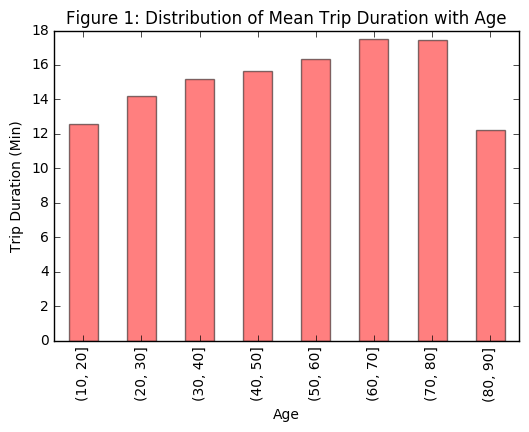

In [48]:
# Plot distribution of trip duration against age
age_trip.plot(kind='bar',color='r', alpha=0.5, legend=False)
plt.xlabel('Age')
plt.ylabel('Trip Duration (Min)')
plt.title('Figure 1: Distribution of Mean Trip Duration with Age')
plt.show()

In [49]:
agerange_sum = data.groupby(data.Age_range).sum()
agerange_sum

,tripduration,Age,trip_duration_minute
Age_range,,,
"(10, 20]",14139193,354162.0,2.356532e+05
"(20, 30]",270478693,8401046.0,4.507978e+06
"(30, 40]",300940803,11524691.0,5.015680e+06
"(40, 50]",208308879,10032291.0,3.471815e+06
"(50, 60]",132962245,7423022.0,2.216037e+06
"(60, 70]",38938125,2369979.0,6.489688e+05
"(70, 80]",4852598,339695.0,8.087663e+04
"(80, 90]",110038,12638.0,1.833967e+03


In [50]:
# Normalize the tripduration by divide by total trip duration
df_normalized = pd.DataFrame()
df_normalized['normalized_trip_duration'] = agerange_sum.tripduration / agerange_sum.tripduration.sum()
df_normalized

,normalized_trip_duration
Age_range,
"(10, 20]",0.014566
"(20, 30]",0.278634
"(30, 40]",0.310015
"(40, 50]",0.214590
"(50, 60]",0.136971
"(60, 70]",0.040112
"(70, 80]",0.004999
"(80, 90]",0.000113


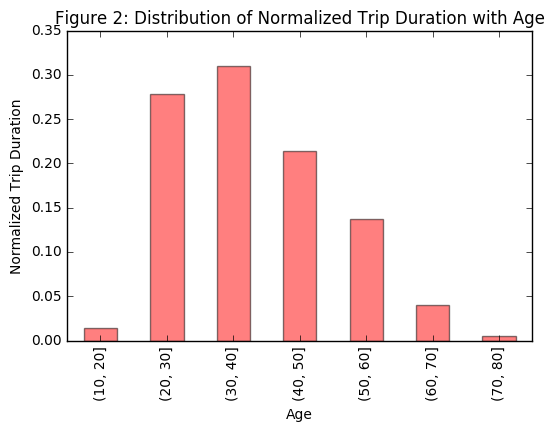

In [42]:
df_normalized.plot(kind='bar', color='r', alpha=0.5, legend=False)
plt.xlabel('Age')
plt.ylabel('Normalized Trip Duration')
plt.title('Figure 2: Distribution of Normalized Trip Duration with Age')
plt.show()

In [67]:
# Divide the data into two between age 50
below40 = df_normalized[0:4].normalized_trip_duration.sum()
above40 = df_normalized[4:8].normalized_trip_duration.sum()
# Calculate the standard error of the mean for trip durations
sample_std_above = data[data.Age>50].trip_duration_minute.std()
n_above = data[data.Age>50].trip_duration_minute.count()
error_above = sample_std_above/np.sqrt(n_above)

sample_std_below = data[data.Age<=50].trip_duration_minute.std()
n_below = data[data.Age<=50].trip_duration_minute.count()
error_below = sample_std_below/np.sqrt(n_below)
print (error_below)
print (error_above)
print (n_above)
print (above40)

0.147777597661
0.278709630651
177758
0.182195771656


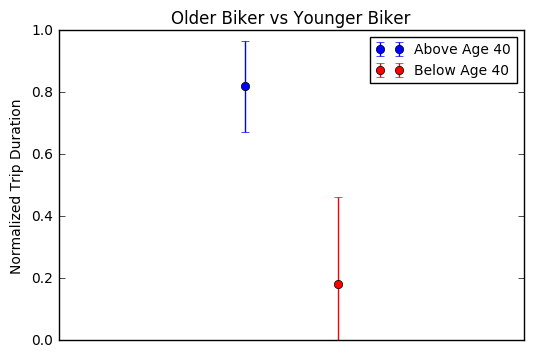

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.errorbar(x = [0.2], y = below40, yerr=error_below, fmt='o', label='Above Age 40')
ax.errorbar(x = [0.3], y = above40, yerr=error_above, fmt='o',color='r', label='Below Age 40')
ax.set_ylim(0,1)
ax.set_xlim(0,0.5)
ax.set_title('Older Biker vs Younger Biker')
ax.set_ylabel('Normalized Trip Duration')
plt.legend(fontsize = 10)

plt.show()

In [76]:
treatment1 = data[data.Age<=50]
treatment2 = data[data.Age>50]
print (treatment1)

         tripduration   Age  trip_duration_minute Age_range
0                 171  42.0              2.850000  (40, 50]
1                 593  25.0              9.883333  (20, 30]
2                 233  31.0              3.883333  (30, 40]
3                 250  31.0              4.166667  (30, 40]
6                1185  28.0             19.750000  (20, 30]
7                 618  26.0             10.300000  (20, 30]
8                 865  24.0             14.416667  (20, 30]
9                 454  20.0              7.566667  (10, 20]
10                408  31.0              6.800000  (30, 40]
11                286  31.0              4.766667  (30, 40]
12                306  32.0              5.100000  (30, 40]
13                282  20.0              4.700000  (10, 20]
14                218  24.0              3.633333  (20, 30]
15               1099  26.0             18.316667  (20, 30]
16                374  21.0              6.233333  (20, 30]
17                645  41.0             

In [77]:
from scipy import stats  
z_stat, p_val = stats.ranksums(treatment1, treatment2) 

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:5386: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  obs = np.r_[True, arr[1:] != arr[:-1]]


In [79]:
print (p_val)

0.0


### If P <= 0.05, we are highly confident that the distributions significantly differ, and can claim that the treatments had a significant impact on the measured value. 


### The p_val = 0 So we can claim the two groups are significantly differ which means Null Hypothesis is rejected and old people tend to use bikes shorter distance than younger people do